In [1]:
import pandas as pd
import numpy as np

from glob import glob
from csv_pkl_sql import save_it

import matplotlib.pyplot as plt
%matplotlib inline

## Import West Nile Kaggle data
This is potential backup data in case my Zika project tanks and/or I decide that I want to use it.

In [2]:
! ls ../west_nile_kaggle/input

mapdata_copyright_openstreetmap_contributors.rds
mapdata_copyright_openstreetmap_contributors.txt
noaa_weather_qclcd_documentation.pdf
sampleSubmission.csv
spray.csv
test.csv
train.csv
weather.csv


In [3]:
spray = pd.read_csv('../west_nile_kaggle/input/spray.csv')
spray['Date'] = pd.to_datetime(spray.Date)
spray['Time'] = pd.to_datetime(spray.Time)
#save_it(spray, '100_west_nile_kaggle_spray')

In [4]:
weather = pd.read_csv('../west_nile_kaggle/input/weather.csv')
weather['Date'] = pd.to_datetime(weather.Date)
#save_it(weather, '100_west_nile_kaggle_weather')

In [5]:
train = pd.read_csv('../west_nile_kaggle/input/train.csv')
train['Date'] = pd.to_datetime(train.Date)
#save_it(weather, '100_west_nile_kaggle_train')

In [6]:
test = pd.read_csv('../west_nile_kaggle/input/test.csv')
test['Date'] = pd.to_datetime(test.Date)
#save_it(weather, '100_west_nile_kaggle_test')

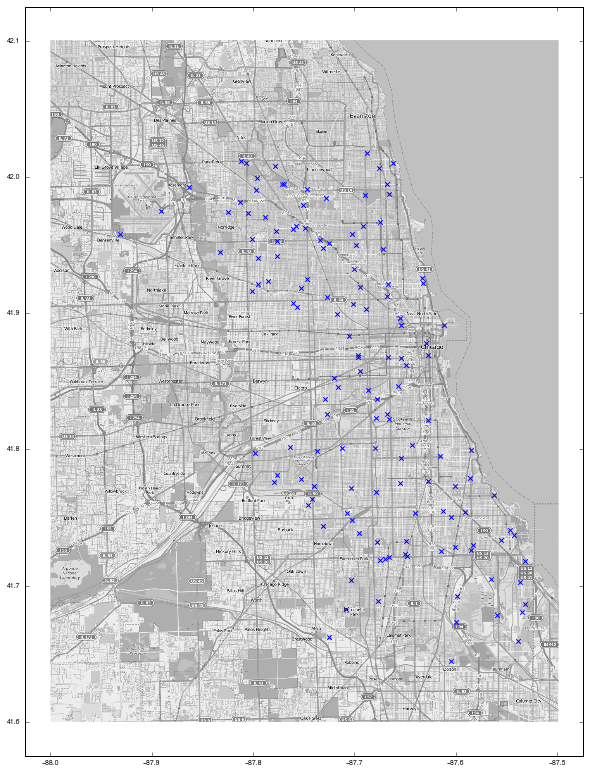

In [15]:
mapdata = np.loadtxt("../west_nile_kaggle/input/mapdata_copyright_openstreetmap_contributors.txt")
traps = pd.read_csv('../west_nile_kaggle/input/train.csv')[['Date', 'Trap','Longitude', 'Latitude', 'WnvPresent']]

aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]
lon_lat_box = (-88, -87.5, 41.6, 42.1)

plt.figure(figsize=(10,14))
plt.imshow(mapdata, 
           cmap=plt.get_cmap('gray'), 
           extent=lon_lat_box, 
           aspect=aspect)

locations = traps[['Longitude', 'Latitude']].drop_duplicates().values
plt.scatter(locations[:,0], locations[:,1], marker='x')
# plt.savefig('heatmap.png')